<a href="https://colab.research.google.com/github/bamboo0727/Neural-Network-Model/blob/master/learning_rate%26optimizers_test_for_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train  neural network: basic classification for Fashion MNIST**

In [0]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot


print(tf.__version__)

1.13.1


## Import the Fashion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Explore the data

Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

Label	Class
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape


(60000, 28, 28)

In [0]:
train_labels.shape

(60000,)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
test_labels.shape

(10000,)

In [0]:
len(train_labels)

60000

## Preprocess the data

 If we inspect the first image in the training set, we will see that the pixel values fall in the range of 0 to 255:

> Indented block



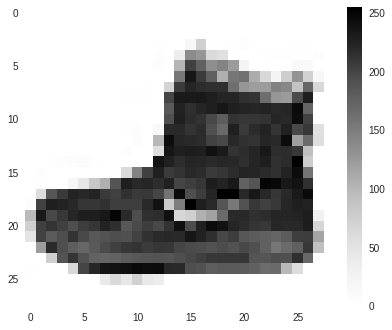

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

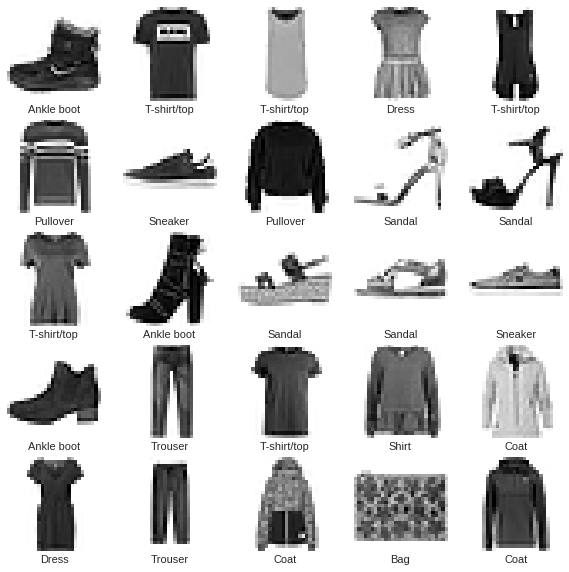

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build and Compile the model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [0]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 168us/sample - loss: 0.4998 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3761 - acc: 0.8639
Epoch 3/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3364 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.3127 - acc: 0.8842
Epoch 5/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2930 - acc: 0.8918


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 113us/sample - loss: 0.3989 - acc: 0.8586
Test accuracy: 0.8586


In [0]:
from keras import optimizers
import numpy as np
import pandas as pd

In [0]:
def get_new_model( ):
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)])

    return(model)
a=[]

lr_to_test = [.000001,0.0001,0.001,0.01,0.1,1]
# loop over learning rates
for lr in lr_to_test:
 model1 = get_new_model()
 sgd = keras.optimizers.SGD(lr=lr)
 model1.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
 model_sgd=model1.fit(train_images, train_labels)
 a.append(model_sgd.history['acc'])
 

60000/60000 [==============================] - 13s 212us/sample - loss: 2.2799 - acc: 0.1536


In [0]:
b=[]
for lr in lr_to_test:
 model2 = get_new_model()
 adam =keras.optimizers.Adam(lr=lr)
 model2.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
 model_adam=model2.fit(train_images, train_labels)
 b.append(model_adam.history['acc'])


  

60000/60000 [==============================] - 17s 290us/sample - loss: 14.5014 - acc: 0.0999


In [0]:
c=[]
for lr in lr_to_test:
 model3 = get_new_model()
 adagrad = keras.optimizers.Adagrad(lr=lr)
 model3.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
 model_adagrad=model3.fit(train_images, train_labels)
 c.append(model_adagrad.history['acc'])

  

  

60000/60000 [==============================] - 17s 276us/sample - loss: 14.5031 - acc: 0.0998


In [0]:
d=[]
for lr in lr_to_test:
 model4 = get_new_model()
 adadelta =keras.optimizers.Adadelta(lr=lr)
 model4.compile(optimizer = adadelta, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
 model_adadelta=model4.fit(train_images, train_labels)
 d.append(model_adadelta.history['acc'])
 


60000/60000 [==============================] - 20s 331us/sample - loss: 0.5134 - acc: 0.8192


In [0]:
e=[]
for lr in lr_to_test:
 model5 = get_new_model()
 rmsprop = keras.optimizers.RMSprop(lr=lr)
 model5.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
 model_remsprop=model5.fit(train_images, train_labels) 
 e.append(model_remsprop.history['acc'])


60000/60000 [==============================] - 18s 306us/sample - loss: 14.5001 - acc: 0.1000


In [0]:
a

[[0.09725], [0.24563333], [0.5883333], [0.76295], [0.8094], [0.15358333]]

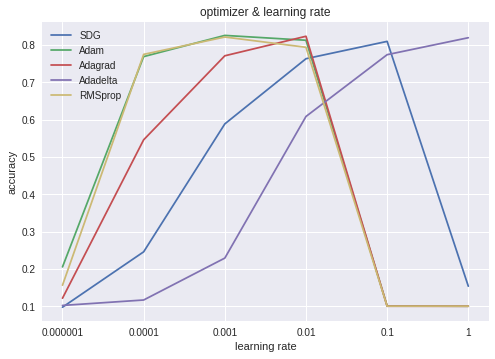

In [0]:

plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.plot(d)
plt.plot(e)
plt.xticks([0,1,2,3,4,5],['0.000001','0.0001','0.001','0.01','0.1','1'])
plt.title('optimizer & learning rate')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.legend(['SDG', 'Adam','Adagrad','Adadelta','RMSprop'])
plt.show()
